<a href="https://colab.research.google.com/github/davidmorme/Universidad/blob/main/Herramientas%20de%20Modelaci%C3%B3n/02_NonlinearSystems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solutions of non linear equations

In this section we will learn how to solve equations of the following type
$$x = \sin x^2$$
or $$x+y-\sin(xy) = 0$$

This equations are typical on real applications so efficient ways to solve and find the solutions are needed.

In the following we will learn some basic methods and then jump directly to the tools given by python. 

- Bracketing methods
- Open methods

![](https://github.com/iluvatar1/ModelingToolsEngineering/blob/master/02-SolucionSistemasNoLineales/images/roots.png?raw=1)

## A problem example : Bunge jumping  (From Chapra 2012)
   The velocity for a jumper is given as 
   $$
   v(t) = \sqrt{\frac{gm}{c_d}} \tanh \left( {\sqrt{\frac{gc_d}{m}}t} \right) .
   $$
   You need to find the critical mass $m$ such us the speed does not
   exceed $v = 36$ m/s after $t = 4$ s, for $c_d = 0.25$ kg/m. How to
   do it? 

   Start by defining a new function, $f(m)$, such us 
   $$
   f(m) = \sqrt{\frac{gm}{c_d}} \tanh \left( {\sqrt{\frac{gc_d}{m}}t}
   \right) - v(t).
   $$
   Now your problem is to find the root of the function $f(m)$

# Graphical Method
   The first approach is to plot the function $f(m)$ and find the root
   graphically. The following snippet shows you how to do that

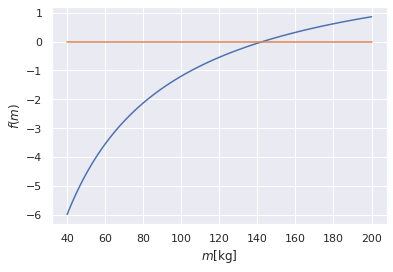

In [ ]:
%matplotlib inline
import numpy as np # used for numbers array
import matplotlib.pyplot as plt # to plot
import seaborn as sns # this improves the figures aesthetics
#from matplotlib import rc
#rc('text', usetex=True) # use latex rendering
sns.set() # activate seaborn
sns.set_context("notebook") # increase fonts and imporove look for a talk ----- must be in paper, notebook, talk, poster

# Define some problem constants
cd = 0.25
g = 9.81
v = 36
t = 4

# create array 
m = np.linspace(40, 200, 100) # 100 points between 40 an 200
fm = np.sqrt(g*m/cd)*np.tanh(np.sqrt(g*cd/m)*t) - v # fm is the function evaluated on those 100 points!

# Plot
fig, ax = plt.subplots()
ax.plot(m, fm)
ax.plot(m, np.zeros_like(m))
ax.set_xlabel(r"$m$[kg]")
ax.set_ylabel(r"$f(m)$")
fig.savefig("fm.png", dpi=300, bbox_inches='tight')

In [ ]:
fmabs=np.abs(fm)
print(m[np.argmin(fmabs)-1],m[np.argmin(fmabs)],m[np.argmin(fmabs)+1])

141.8181818181818 143.43434343434342 145.05050505050505


142.73636363636362 142.73737373737373 142.73838383838384


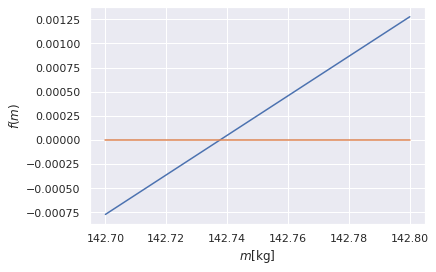

In [ ]:
m = np.linspace(142.7, 142.8, 100) # 100 points between 140 an 145
fm = np.sqrt(g*m/cd)*np.tanh(np.sqrt(g*cd/m)*t) - v # fm is the function evaluated on those 100 points!
fmabs=np.abs(fm)
print(m[np.argmin(fmabs)-1],m[np.argmin(fmabs)],m[np.argmin(fmabs)+1])
# Plot
fig, ax = plt.subplots()
ax.plot(m, fm)
ax.plot(m, np.zeros_like(m))
ax.set_xlabel(r"$m$[kg]")
ax.set_ylabel(r"$f(m)$")
fig.savefig("fm.png", dpi=300, bbox_inches='tight')

### Exercise 
    Plot the function on your computer and find the value for the mass. How much is $f(m)$ for that value? Do you think this graphical approach is useful?


# Bracketing methods

  - This methods require that you define an interval where to find the
    root.
  - There could be single or multiple roots, or no root at all. 
  - The initial guess for the interval limits are such the root is
    included. 
  - The convergence is slow but sometimes guaranteed. 
![](https://github.com/iluvatar1/ModelingToolsEngineering/blob/master/02-SolucionSistemasNoLineales/images/roots-brackets.png?raw=1)

| Bisection | False position |
|:---------:|:--------------:|
| <img src="https://github.com/iluvatar1/ModelingToolsEngineering/blob/master/02-SolucionSistemasNoLineales/images/bisect-example.png?raw=1" width="60%"> | <img src="https://github.com/iluvatar1/ModelingToolsEngineering/blob/master/02-SolucionSistemasNoLineales/images/false-position-basic.png?raw=1" width="30%"> |

# Open methods
- These methods require only a single starting point or two starting points that do not necessarily include the root. 
- Generally, when an open method converges, it is usually much faster than a bracketing method. 
- Examples: 
  - Fixed point : $f(x) =0 \to g(x) = x$. You need an initial guess.
  - Newton-Raphson : N-dimensions, $f'(x_i)= \frac{f(x_i) -0}{x_i - x_{i+1}} \to    x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}. $
  <img src="https://github.com/iluvatar1/ModelingToolsEngineering/blob/master/02-SolucionSistemasNoLineales/images/nr-basic.png?raw=1" width=40%>
  - Other methods: Secant method, Brent's method, Higher order Newton-Raphson formulas, etc. **Use a library!** 

# Using `Scipy root` for one- and multi-dimensional equations
`Scipy` offers you the `root` method to compute the root for a (system of) equations very efficiently. Please go and red the doc at
  https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html . This works both for a single or a system of
  equations. Actually the root method belongs to a more general optimization module (see https://docs.scipy.org/doc/scipy/reference/optimize.html). 


## Scalar equation
The following snippet uses the `root` method, to find the root of the equation $$e^{-2x} -x/3 = 0 $$ 

In [ ]:
from scipy import optimize # use the optimize module
import numpy as np # for data array

# Define the function whose root we are looking for
def fun(x):
    return np.exp(-2*x) - x/3

# Compute the root
sol = optimize.root(fun, [0], method='hybr')

# Print the solution found
print(f"sol: \n {sol}")
print(f"fun(sol.x):\n{fun(sol.x[0])}")
print("Solution: ", sol.x)
#print("f(x): ", fun(sol.x[0]))
#print(fun(sol.x[0]))

sol: 
     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-1.30701006e-13])
       r: array([0.8108016])
  status: 1
 success: True
       x: array([0.71620239])
fun(sol.x):
0.0
Solution:  [0.71620239]


In [ ]:
# Now let's implement it for the parachute problem
from scipy import optimize
import numpy as np

cd = 0.25
g = 9.81
v = 36
t = 4

def fun(m):
    return np.sqrt(g*m/cd)*np.tanh(np.sqrt(g*cd/m)*t) - v

sol = optimize.root(fun, [0.1], method='hybr')
print(sol)
#print(fun(sol.x[0]))
print("Exitoso?: ", sol.success)
print("Solution: ", sol.x)

    fjac: array([[-1.]])
     fun: array([-7.10542736e-15])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([8.07034439e-11])
       r: array([-0.0204557])
  status: 1
 success: True
       x: array([142.73763311])
Exitoso?:  True
Solution:  [142.73763311]


## Multidimensional equation (you can also use `fsolve`)
In this case you have multiple variables functions so the method is a bit more complex. Let's solve the following expression:
$$\vec f(x,y) = (x + 0.5(x-y)^3 -1, 0.5(y-x)^3 + y)$$

In [ ]:
from scipy import optimize
import numpy as np

# define the function
# X is a list (X[0] = x, X[1] = y)
def fun(X):
    return [X[0]  + 0.5 * (X[0] - X[1])**3 - 1.0, 0.5 * (X[1] - X[0])**3 + X[1]]
    #x, y = X
    #return [x  + 0.5 * (x - y)**3 - 1.0, 0.5 * (y - x)**3 + y]

# compute the solution
sol = optimize.root(fun, [0, 0], method='hybr')

# print
print(sol)
print("Solution: ", sol.x)
print("f(x): ", fun(sol.x))
print(fun(sol.x))

    fjac: array([[-0.89914291,  0.43765515],
       [-0.43765515, -0.89914291]])
     fun: array([-1.11022302e-16,  0.00000000e+00])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([ 1.19565972e-11, -4.12770392e-12])
       r: array([-2.16690469,  1.03701789, -1.10605417])
  status: 1
 success: True
       x: array([0.8411639, 0.1588361])
Solution:  [0.8411639 0.1588361]
f(x):  [-1.1102230246251565e-16, 0.0]
[-1.1102230246251565e-16, 0.0]


# Using `Sympy` to find all roots
  [Sympy](http://docs.sympy.org/latest/index.html) is a Python library for symbolic mathematics. Besides this, it
  includes solvers to solve systems of equations finding *all roots*. For modern versions, use the function `solveset`.  
    
    

In [ ]:
# check http://scipy-lectures.org/packages/sympy.html#equation-solving
import sympy as sym
x, y, z = sym.symbols('x y z')
res = sym.solveset(x**2-2 , x) # x^2 - 2 = 0 -> x = +- sqrt(2)
print(res)

FiniteSet(sqrt(2), -sqrt(2))


In [ ]:
import sympy as sym
x= sym.symbols('x')
res = sym.solveset((x+2)*(x-1)*(x-2), x)
print(res)


FiniteSet(-2, 1, 2)


# Exercises 

## Scalar functions
   Compute the root for the following scalar functions:
   - $f(x) = \sin(\sqrt{x}) - x$, $x_0 = 0.5$   
   - $f(x) = x^3 -6x^2 +11x - 6.1$, $x_0 = 3.5$

In [ ]:
from scipy import optimize
import numpy as np

def fun(x):
  return np.sin(np.sqrt(x))-x

sol = optimize.root(fun, [3], method= 'hybr')
print(sol)

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([2.08802975e-11])
       r: array([0.63519355])
  status: 1
 success: True
       x: array([0.76864886])


In [ ]:
from scipy import optimize
import numpy as np

def fun(x):
  return x**3 -6*x**2 +11*x - 6.1

sol = optimize.root(fun, [3], method= 'hybr')
print(sol)

    fjac: array([[-1.]])
     fun: array([-5.32907052e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-7.09169612e-10])
       r: array([-2.28661724])
  status: 1
 success: True
       x: array([3.04668053])


In [ ]:
from scipy import optimize
import numpy as np

def fun1(x):
    return np.sin(np.sqrt(x)) - x
def fun2(x):
    return x*x*x - 6*x*x + 11*x - 6.1

sol1 = optimize.root(fun1, [0.5],  method='hybr')
print(sol1.x[0])
sol2 = optimize.root(fun2, [3.5],  method='hybr')
print(sol2.x[0])
print(fun2(sol2.x[0]))

0.7686488567609495
3.0466805318046757
1.687538997430238e-13


In [ ]:
import sympy as sym
x= sym.symbols('x')
res = sym.solveset(x*x*x - 6*x*x + 11*x - 6.1, x)
print(res)

FiniteSet(1.05435072607641, 1.89896874211899, 3.0466805318046)


## The bungee jumping again
   Plot the critical mass as a function of the coefficient $c_d \in
   {0.1, 0.15, 0.2, 0.25, 0.3, \ldots, 0.9}$, such us the speed is $v
   = 36$ m/s after $t = 4$ s.
   
   Remember that 
   $$
   f(m) = \sqrt{\frac{gm}{c_d}} \tanh \left( {\sqrt{\frac{gc_d}{m}}t}
   \right) - v(t).
   $$

In [ ]:
from scipy import optimize
import numpy as np

g = 9.81
v = 36
t = 4
CD = [0.1,0.15,0.2,0.25,0.3, 0.5, 0.9]

for cd in CD: 
    def fun(m):
        return np.sqrt(g*m/cd)*np.tanh(np.sqrt(g*cd/m)*t) - v
    sol = optimize.root(fun, [0.1], method='hybr')
    print("Solution: ", sol.x[0])
    

Solution:  57.095053243379716
Solution:  85.64257986506958
Solution:  114.19010648675963
Solution:  142.73763310844913
Solution:  171.28515973013913
Solution:  285.47526621689417
Solution:  513.8554791904179


## Intersection on 3D objects (System of equations)
   /Ref: Kiusalaas, Numerical Methods in Engineering with Python 3,
   Example 4.8/
   Determine the points of intersection between the circle $x^2 + y^2
   = 3$ and the hyperbola $xy = 1$. Start from  $x = 0.5, y = 1.5$.

   The solutions are $\pm(0.618, 1.618)$ and $\pm(1.618,
   0.618)$. 
   

In [ ]:
from scipy import optimize
import numpy as np

# V is a list (V[0] = x, V[1] = y)
def fun(V):
    return [V[0]**2 + V[1]**2 - 3, V[0]*V[1] - 1]

sol = optimize.root(fun2, [-0.5, -1.5],  method='hybr')
#print("Solution: ", sol.x)
#print("f(x): ", fun(sol.x))
print(sol.x)

[-0.61803399 -1.61803399]


In [ ]:
print(fun1(5,10))
print(fun2([5,10]))

[122, 49]
[122, 49]


## System of non-linear equations 
   /Ref: Kiusalaas, Numerical Methods in Engineering with Python 3,
   Example 4.9/

   Solve the following non-linear system:
   $$ \sin x + y^2 + \ln z − 7 = 0 $$
   $$3x + 2^y − z^3 + 1 = 0$$ 
   $$x+y+z−5=0$$
   Starting from   $(1, 1, 1)$. 

   The solution is  $[0.59905376 , 2.3959314 , 2.00501484]$

   *Note:* If you solve this using =sympy=, you will find that there
    are infinite solutions. 

In [ ]:
from scipy import optimize
import numpy as np

# V is a list (V[0] = x, V[1] = y, V[2] = z)
def fun(V):
    x, y, z = V
    return [np.sin(x) + y*y + np.log(z) - 7, 
            3*x + np.power(2, y) - z*z*z + 1,
            x + y + z - 5]

sol = optimize.root(fun, [1, 1, 1], method='hybr')
#print("Solution: ", sol.x)
#print("f(x): ", fun(sol.x))
print(sol.x)

[0.59905376 2.3959314  2.00501484]


## Circle from points
   /Ref: Kiusalaas, Numerical Methods in Engineering with Python 3,
   Exercise 4-26/ 
   The equation of a circle is $(x−a)^2+(y−b)^2 =R^2$ where $R$ is
   the radius and $(a,b)$ are the coordinates of the center. If the
   coordinates of three points on the circle are 
   
   | x | 8.21 | 0.34 |  5.96 |
   |---|---|---|---|
   | y | 0.00 | 6.62 | −1.12 |
   
   determine $R, a, b$

## Multi-function, plot
   Solve the system 
   $$y-x^3 -2x^{22} +1=0$$ 
   $$y+x^2-1=0$$
   Plot both functions to verify graphically that you have found the
   roots. 
   

## Multi-dimensional system
   /E. Ward, Numerical Methods, Exercise 3-21/
   Consider the nonlinear system
   $$ f (x, y) = x^2 + y^2 − 25 = 0, $$
   $$ g(x, y) = x^2 − y − 2 = 0. $$

   Plot both functions. Compute the solution of the system and
   identify graphically the solution points. 
   

## Rocket
   The upward velocity of a rocket can be computed by the following
   formula: $$v = \ln \frac{m_0}{m_0-qt} - gt $$ where $v =$ upward velocity,
   $u =$ the velocity at which fuel is expelled relative to the
   rocket, $m_0 =$ the initial mass of the rocket at time $t = 0, q =$
   the fuel consumption rate, and $g =$ the downward acceleration of
   gravity (assumed constant $= 9.81$ m/s$^2$). If $u = 1800$ m/s,
   $m_0 = 160,000$ kg, and $q = 2600$ kg/s, compute the time at which
   $v = 750$ m/s. (Hint: $t$ is somewhere between $10$ and $50$ s.)

## Cylinder (6.16)                                                 
   The volume of liquid V in a hollow horizontal cylinder of radius r
   and length L is related to the depth of the liquid h by 
   V= r2cos−1 r−h −(r−h) 2rh−h2 L
   Determine h given r = 2 m, L = 5 m3, and V = 8 m3
   
   Plot h as function of $r \in [0.1, 5.6]$. 
   

## GPS - GLobal Positioning System                                 
   E. Ward, Exercise 3-41
   (Global positioning system project) Each time a GPS is used, a
   system of nonlinear equations of the form $$(x−a_1)^2 +(y−b_1)^2
   +(z−c_i)^2 =[(C(t_1 −D)]^2$$ $$(x−a_2)^2 +(y−b_2)^2 +(z−c_i)^2
   =[(C(t_2 −D)]^2$$ $$(x−a_3)^2 +(y−b_3)^2 +(z−c_i)^2 =[(C(t_3
   −D)]^2$$ $$(x−a_4)^2 +(y−b_4)^2 +(z−c_i)^2 =[(C(t_4 −D)]^2$$ is
   solved for the $(x, y, z)$ coordinates of the receiver. For each
   satellite $i$, the locations are $(a_i,b_i,c_i)$, and $t_i$ is the
   synchronized transmission time from the satellite. Further, $C$ is
   the speed of light, and $D$ is the difference between the
   synchronized time of the satellite clocks and the earth-bound
   receiver clock. While there are only two points on the intersection
   of three spheres (one of which can be determined to be the desired
   location), a fourth sphere (satellite) must be used to resolve the
   inaccuracy in the clock contained in the low-cost receiver on
   earth. Explore various ways for solving such a nonlinear
   system. See Hofmann-Wellenhof, Lichtenegger, and Collins [2001],
   Sauer [2006], and Strang and Borre [1997].
   
   